In [6]:
!pip install pandas numpy matplotlib seaborn xgboost scikit-learn

In [7]:
!wget https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv -O train.csv
!wget https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/test.csv -O test.csv

print("Файлы скачаны!")

--2026-01-03 20:31:00--  https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 449.88K  --.-KB/s    in 0.04s   

2026-01-03 20:31:00 (10.4 MB/s) - ‘train.csv’ saved [460676/460676]

--2026-01-03 20:31:00--  https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]
Saving to: ‘t

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Данные загружены!")
print(train.head())

Данные загружены!
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0  

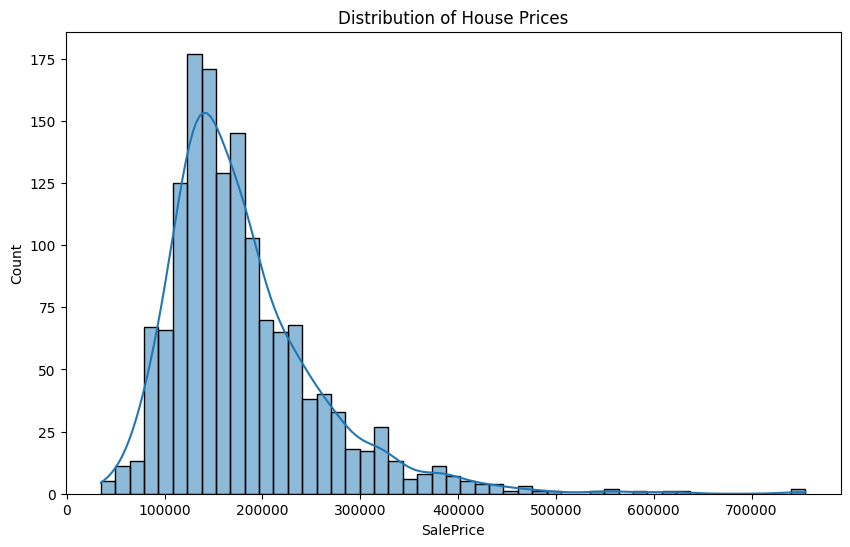

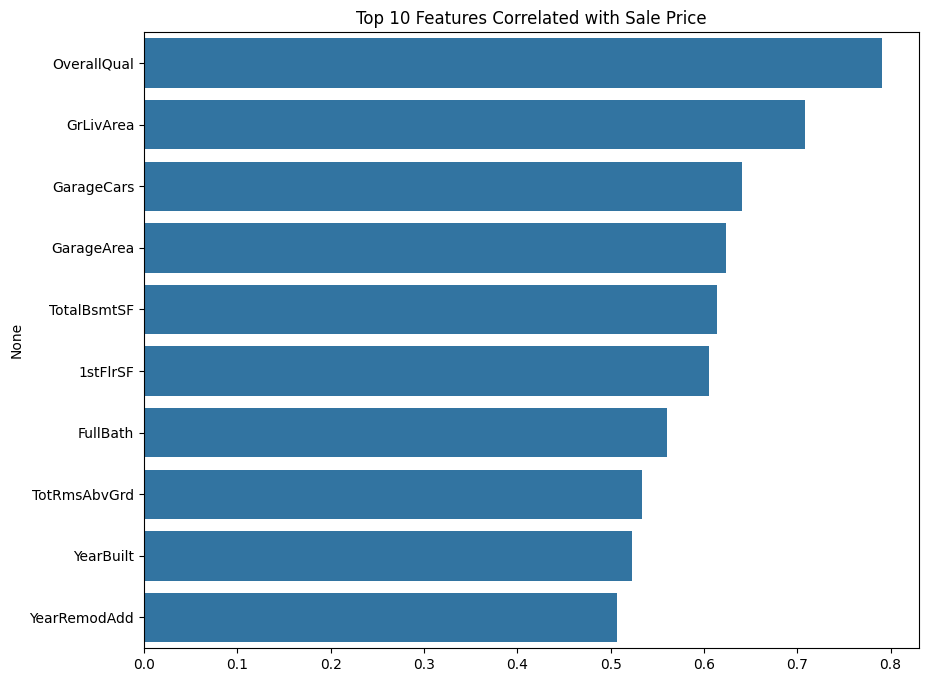

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.savefig('price_distribution.png')
plt.show()

corr = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=corr.values[1:11], y=corr.index[1:11])
plt.title('Top 10 Features Correlated with Sale Price')
plt.savefig('top_correlations.png')
plt.show()

In [10]:

all_data = pd.concat([train.drop(['SalePrice'], axis=1, errors='ignore'), test], axis=0)
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

X_train = all_data[:len(train)]
y_train = np.log1p(train['SalePrice'])
X_test = all_data[len(train):]


model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3, random_state=42)
model.fit(X_train, y_train)


preds = np.expm1(model.predict(X_test))


submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': preds})
submission.to_csv('submission.csv', index=False)
print("Готово! Скачиваем файлы")

from google.colab import files
files.download('submission.csv')
files.download('price_distribution.png')
files.download('top_correlations.png')

Готово! Скачиваем файлы


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>